In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data = pd.read_csv('heart.csv')
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
print(data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
categorical_columns = data.select_dtypes(include=object).columns.tolist()
numerical_columns = data.select_dtypes(exclude=object).columns.tolist()
print(' categorical_columns: ' ,categorical_columns)
print('numerical_columns: ' , numerical_columns)

 categorical_columns:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


### Display the statistical values for each of the attributes, along with visualizations

In [ ]:
# Displaying the statistical values
stats_summary = data.describe()
print(stats_summary)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


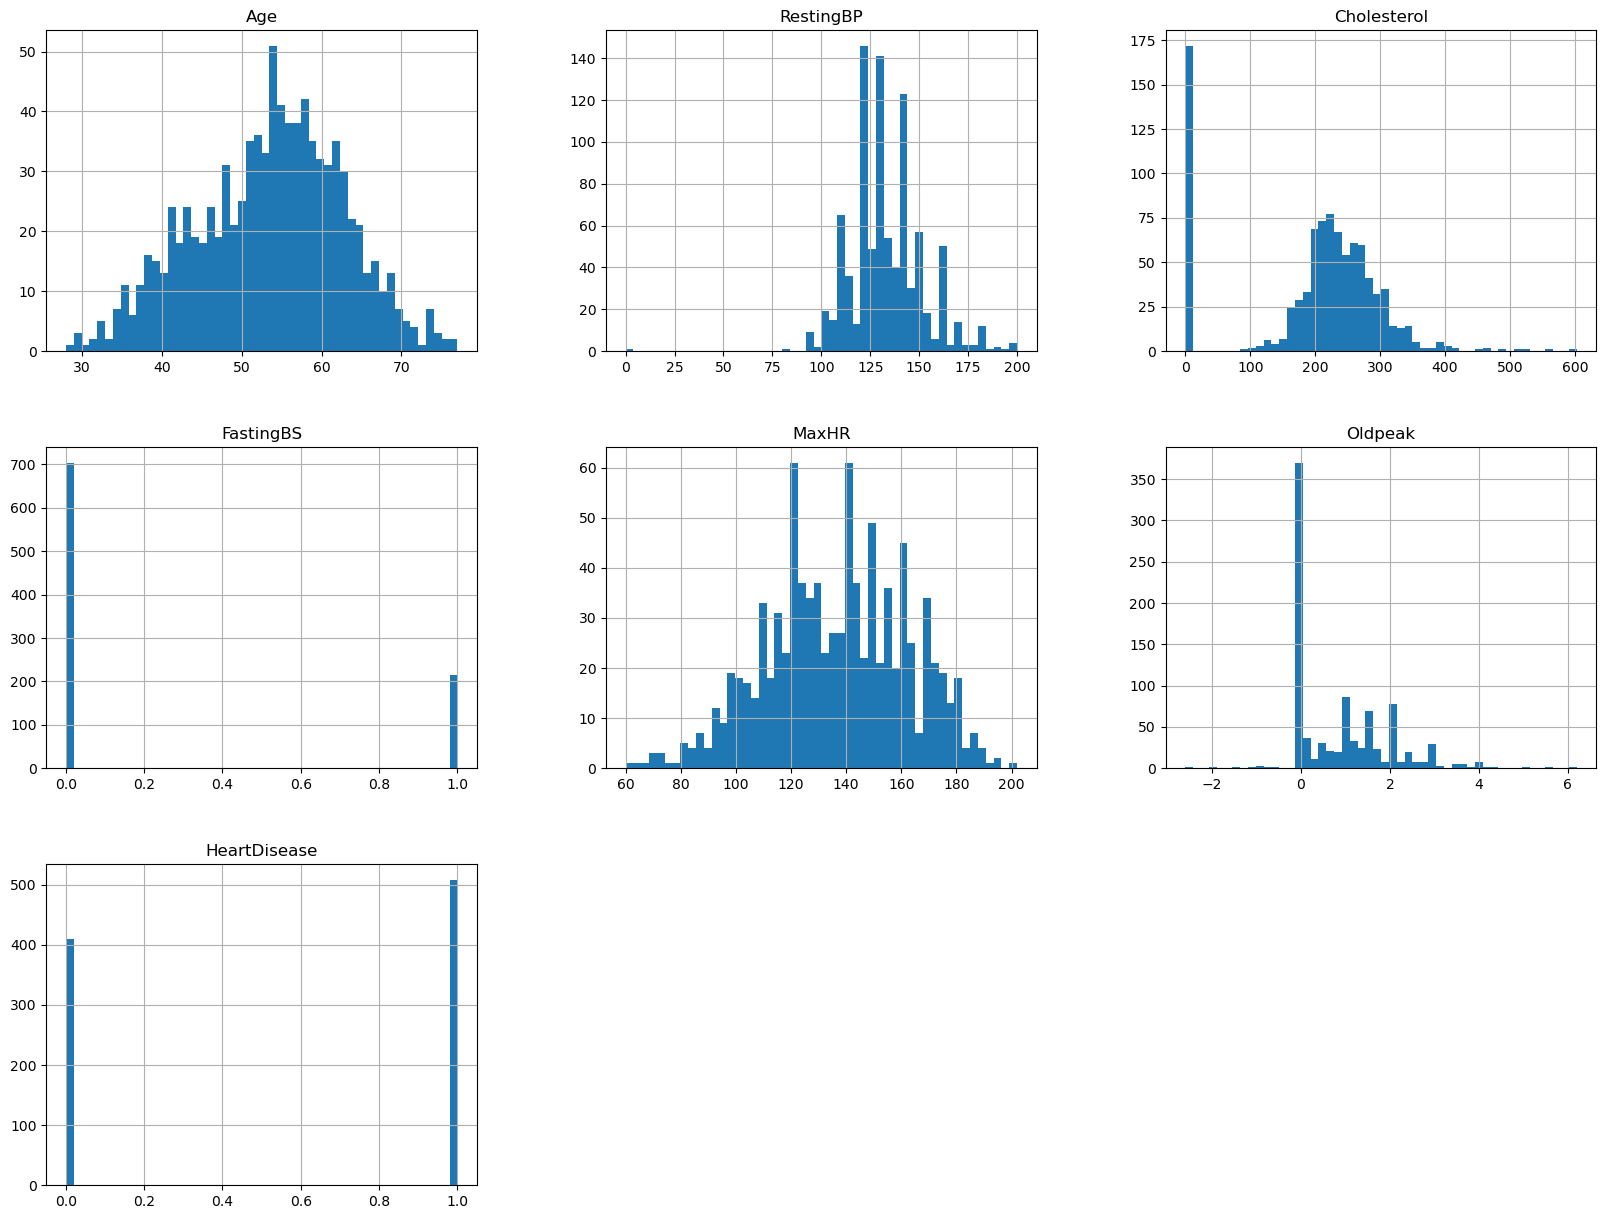

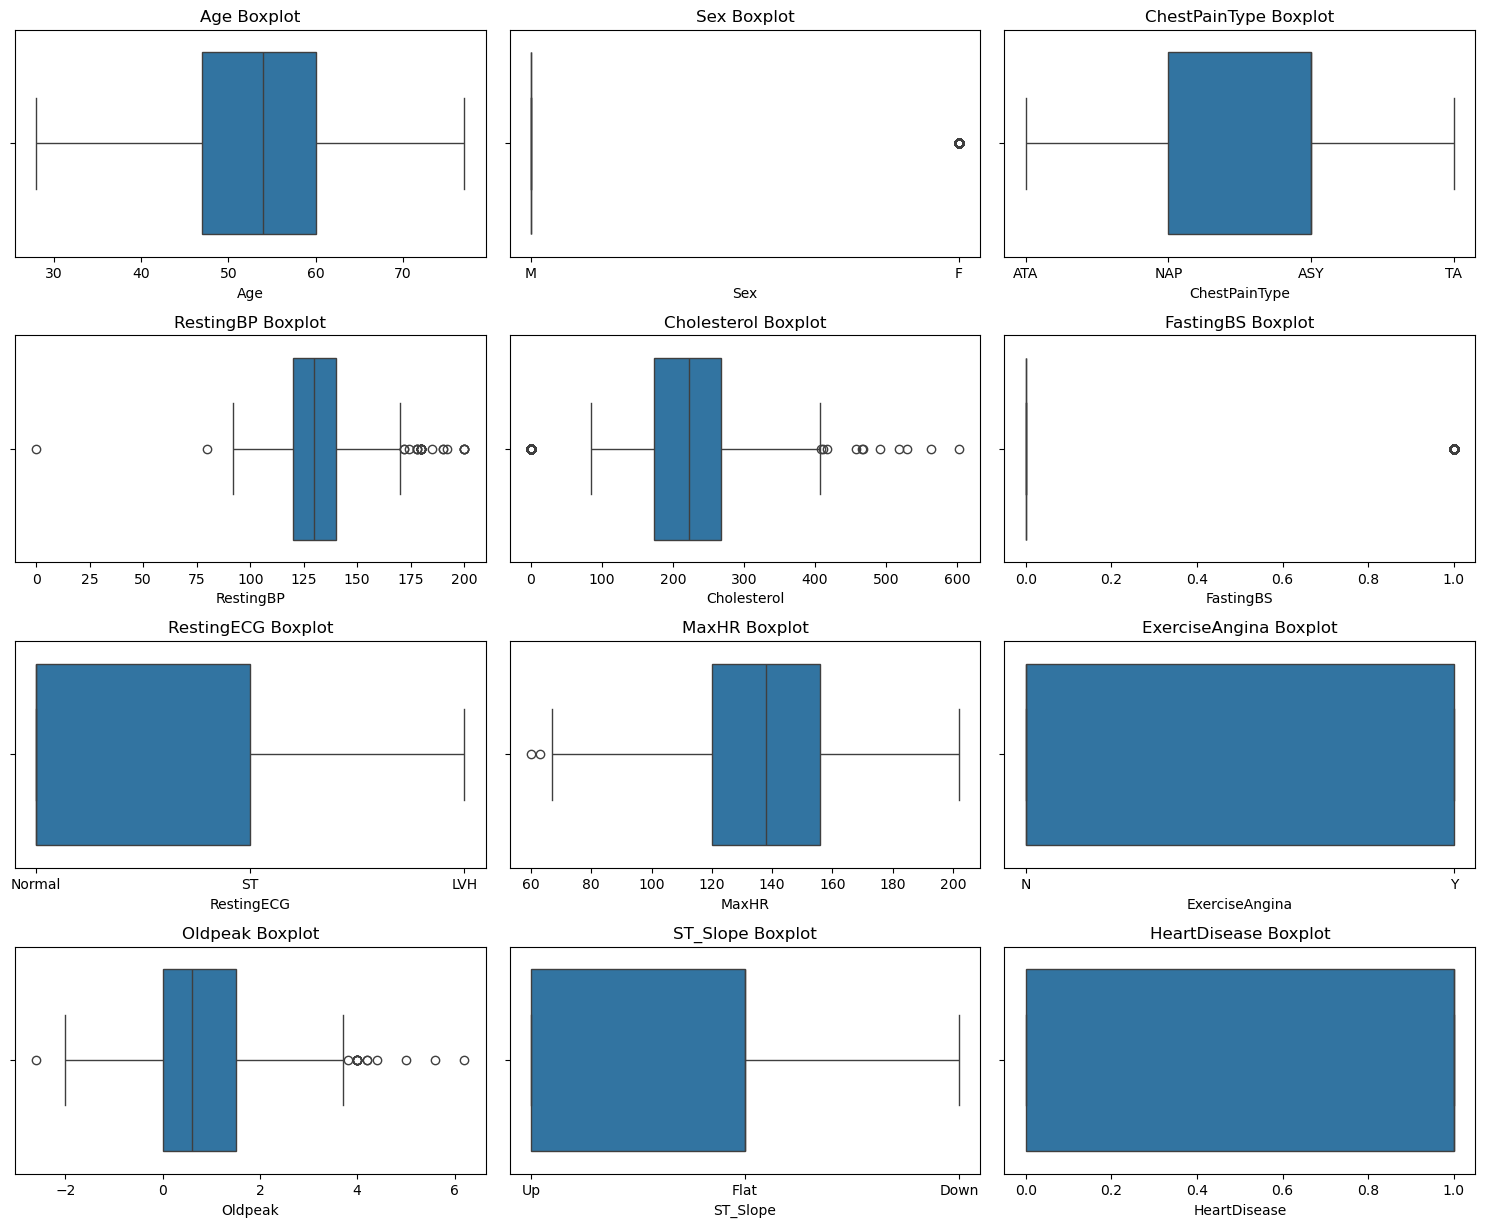

In [ ]:
#Vizualising the attributes
data.hist(bins=50, figsize=(20,15))
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(15, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()


## Analysis of above Vizualisations

Most continuous features, like age, cholesterol, and blood pressure, show reasonable variation and include values associated with heart disease risk.

The distribution of binary features like FastingBS and HeartDisease indicates a balance, allowing for binary classification.

Features like oldpeak have a skewed distribution, which may suggest a few severe cases that could be significant for predicting heart disease.

## Special Treatment

For features like RestingBP, Cholesterol outliers can be handled by capping or removing extreme values.

The features like 'Age', 'RestingBP', 'Cholesterol',FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease' can be scaled appropriately

In [ ]:
# Outlier treatment to remove extreme outliers
for column in ['RestingBP', 'Cholesterol']:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Cap values
    data[column] = np.where(data[column] > upper_bound, upper_bound,
                            np.where(data[column] < lower_bound, lower_bound, data[column]))

# Log transformation for 'oldpeak'
data['Oldpeak'] = np.log1p(data['Oldpeak'])

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Computing the Pearson correlation coefficient matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.269950    -0.088063   0.198039 -0.382045   
RestingBP          0.269950   1.000000     0.107313   0.065864 -0.112987   
Cholesterol       -0.088063   0.107313     1.000000  -0.257816  0.233166   
FastingBS          0.198039   0.065864    -0.257816   1.000000 -0.131438   
MaxHR             -0.382045  -0.112987     0.233166  -0.131438  1.000000   
Oldpeak            0.282513   0.148171     0.014278   0.117718 -0.194926   
HeartDisease       0.282039   0.113191    -0.225304   0.267291 -0.400421   
Sex_M              0.055750   0.016555    -0.203929   0.120076 -0.189186   
ChestPainType_ATA -0.218165  -0.054396     0.150955  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.032212    -0.013576  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.055632     0.015875   0.026885  0.100025   
RestingECG_Normal -0.230566  -0.115687    -0.045158  -0.093028  0.023801   
RestingECG_S

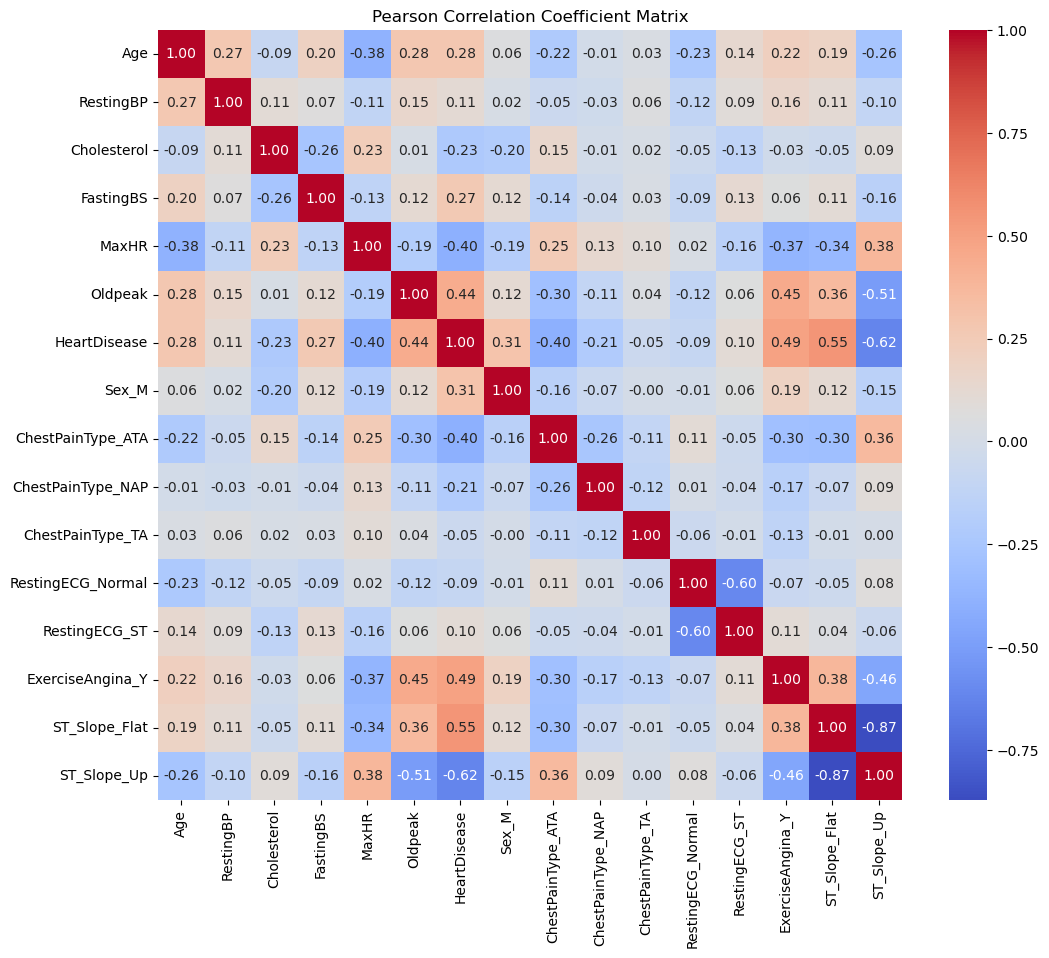

In [ ]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson Correlation Coefficient Matrix")
plt.show()

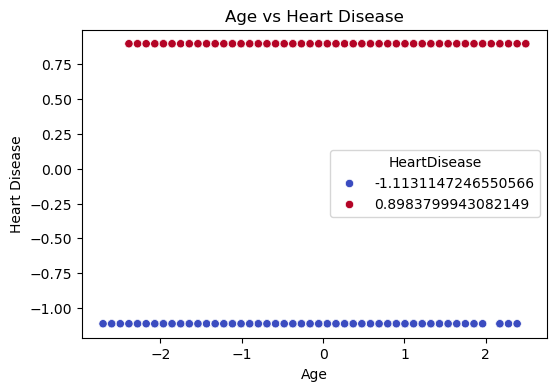

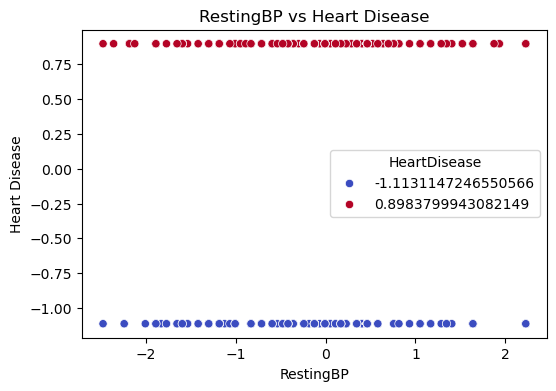

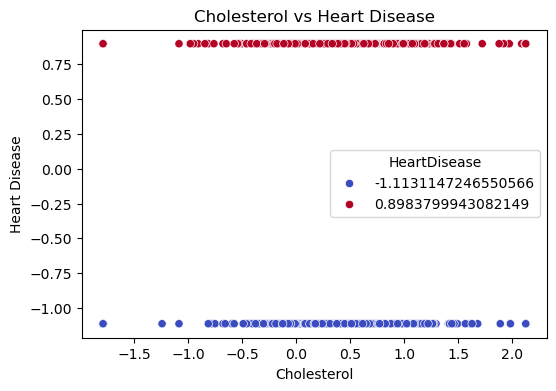

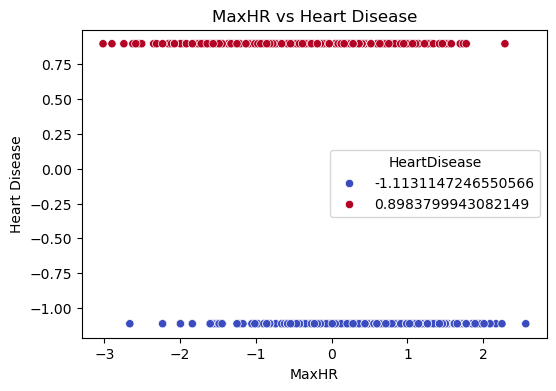

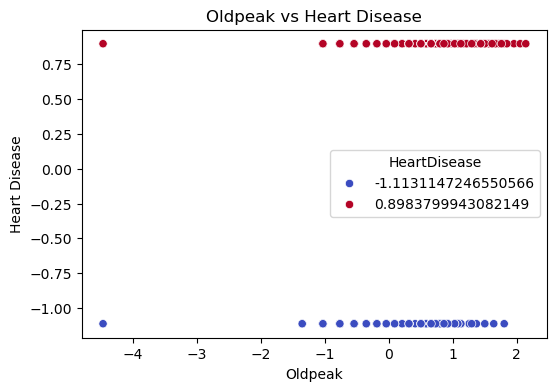

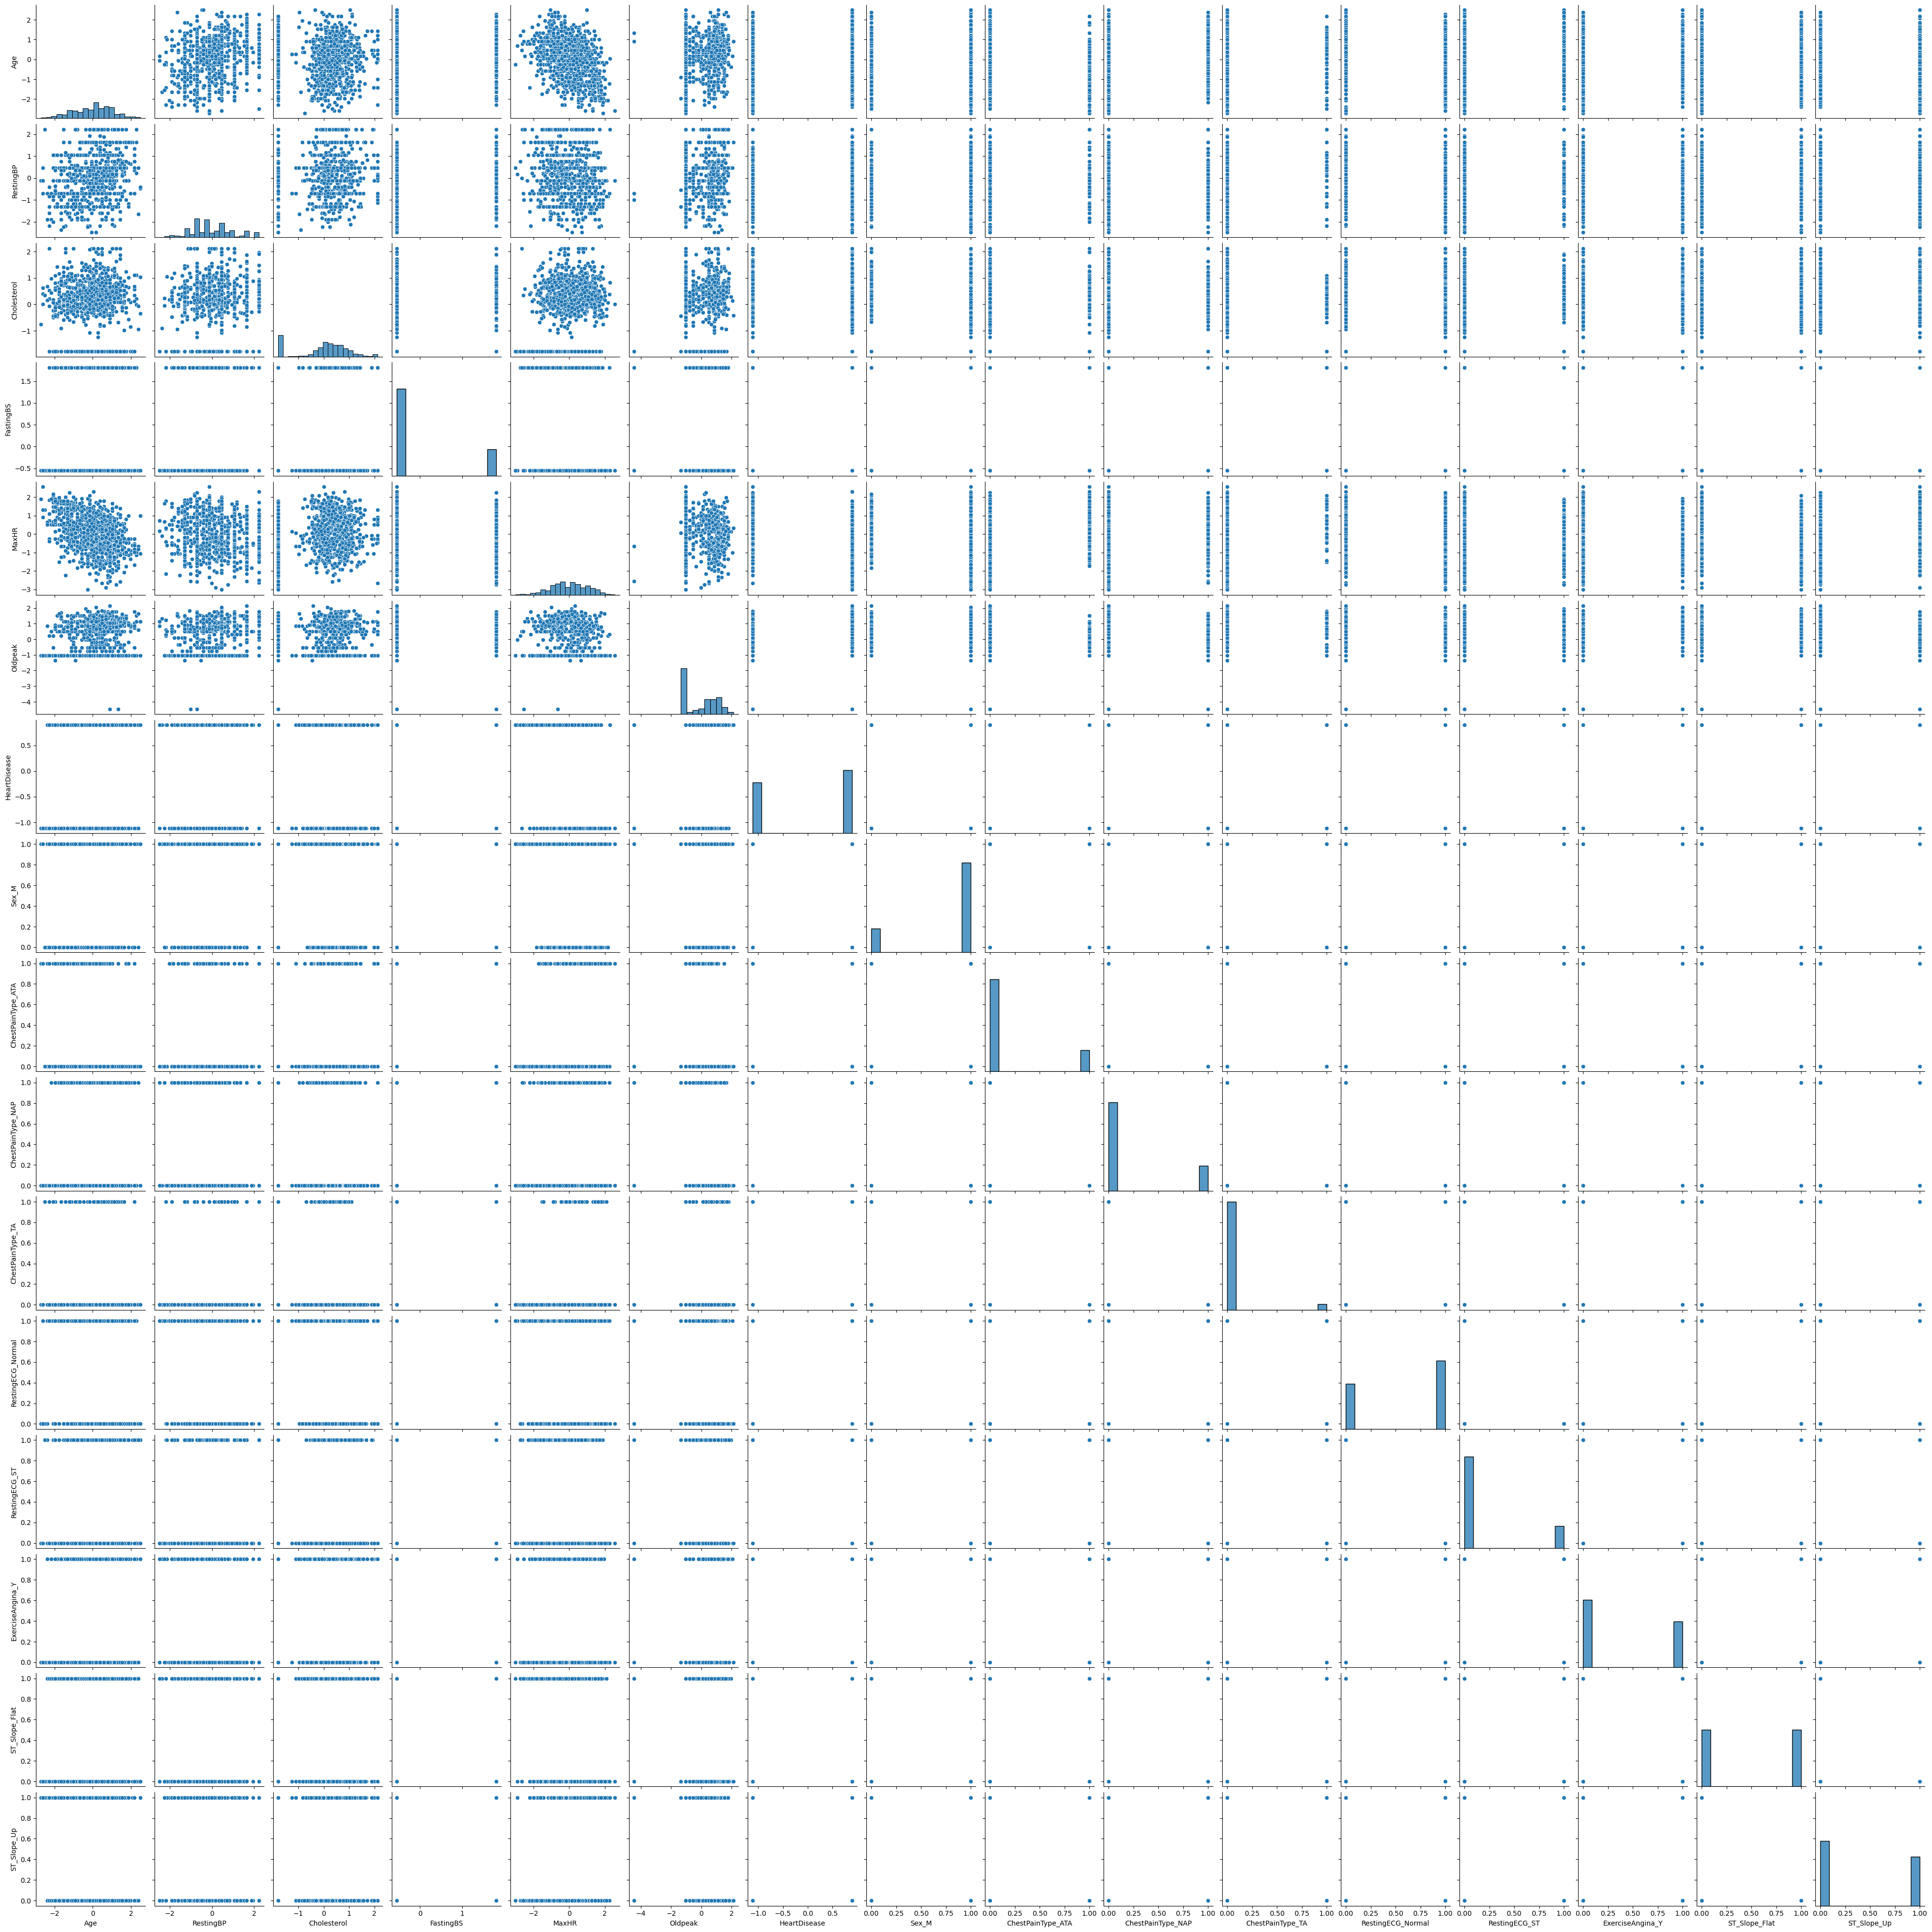

In [ ]:
#scatterplot
for column in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[column], y=data['HeartDisease'], hue=data['HeartDisease'], palette='coolwarm')
    plt.title(f'{column} vs Heart Disease')
    plt.xlabel(column)
    plt.ylabel('Heart Disease')
    plt.show()

sns.pairplot(data)
plt.show()

#### Strong Correlations
ST_Slope_Flat and ST_Slope_Up have a very strong negative correlation (-0.87), indicating that they are highly inversely related.

HeartDisease and ST_Slope_Flat (0.55) and HeartDisease and ST_Slope_Up (-0.62): Heart disease has a strong positive correlation with a flat ST slope and a strong negative correlation with an upward slope. This suggests that ST slope could be a strong predictor for heart disease, and using both slope variables might help improve the model's predictive performance.

#### Moderate Correlations
Age has a moderate positive correlation with heart disease, suggesting that older age is associated with a higher risk of heart disease.

Maximum heart rate achieved is moderately negatively correlated with heart disease, indicating that individuals with lower maximum heart rates are more likely to have heart disease.

#### Weak Correlations
RestingBP, Cholesterol, and RestingECG features have weak correlations with HeartDisease, suggesting they may not be strong predictors individually.

### creating a train/test/validation split

In [ ]:
from sklearn.impute import SimpleImputer

# Define features and target variable
X = data.drop('HeartDisease', axis=1)  # Features
y = data['HeartDisease']  # Target variable

# Convert target variable to binary if not already
if y.dtype != 'int64' and y.dtype != 'object':
    y = (y > 0).astype(int)  # Convert to binary

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Perform imputation on features

# Splitting the data into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_imputed, y, test_size=0.2, stratify=y, random_state=42)

# Second split: 80% train and 20% validation from the train+val set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

# Check the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 587
Validation set size: 147
Test set size: 184


In [ ]:
#verification
total_size = len(data)

print(f"Total dataset size: {total_size}")
print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0] / len(data) * 100:.2f}%)")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0] / len(data) * 100:.2f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0] / len(data) * 100:.2f}%)")

Total dataset size: 918
Training set size: 587 (63.94%)
Validation set size: 147 (16.01%)
Test set size: 184 (20.04%)


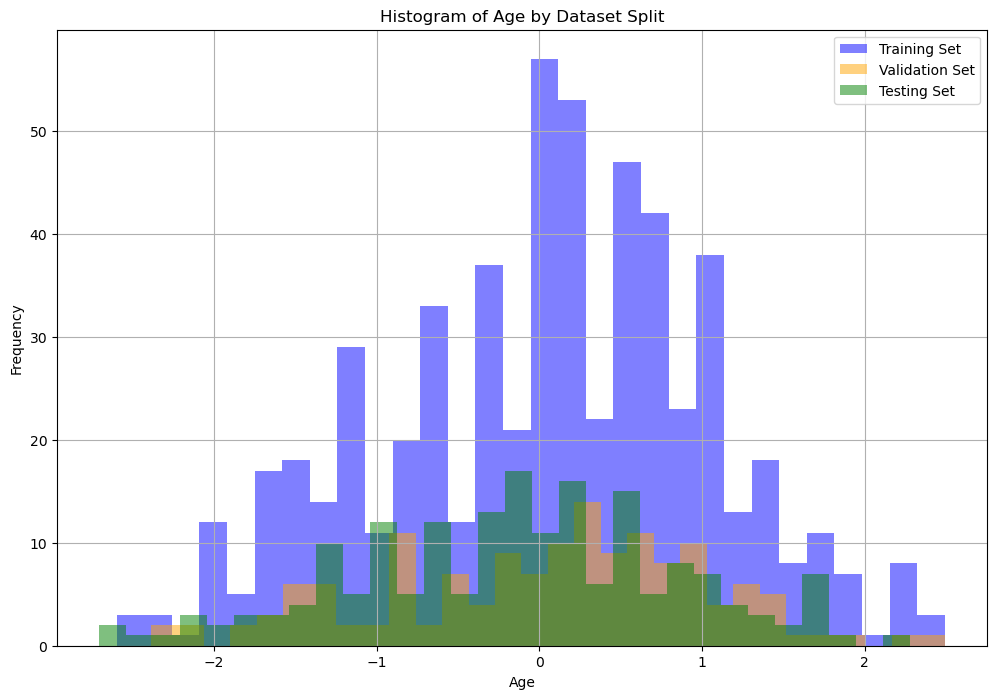

In [ ]:
#Visualization for verification of split data
age_index = 0
plt.figure(figsize=(12, 8))
plt.hist(X_train[:, age_index], bins=30, alpha=0.5, label='Training Set', color='blue')
plt.hist(X_val[:, age_index], bins=30, alpha=0.5, label='Validation Set', color='orange')
plt.hist(X_test[:, age_index], bins=30, alpha=0.5, label='Testing Set', color='green')
plt.title(f'Histogram of Age by Dataset Split')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Part A - Multinominal Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)

# Hyperparameter grid
logreg_param_grid = {
    'C': [1],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Grid Search
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='f1_macro')
logreg_grid_search.fit(X_train, y_train)


print("Best hyperparameters for Logistic Regression:", logreg_grid_search.best_params_)



Best hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


## Insights

A value of 1 strikes a balance between fitting the data well and maintaining generalization.

Setting max_iter to 100 ensures that the optimization process has enough iterations to find a suitable solution

lbfgs is generally faster and more efficient for optimization

In [ ]:
best_logreg_model = logreg_grid_search.best_estimator_

y_train_pred = best_logreg_model.predict(X_train)
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))
log_train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on Validation Set
y_val_pred = best_logreg_model.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))
log_val_accuracy = accuracy_score(y_val, y_val_pred)

# Evaluate on Test Set (if you have a test set available)
y_test_pred = best_logreg_model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))
log_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {log_train_accuracy:.2f}")
print(f"Testing Accuracy: {log_test_accuracy:.2f}")
print(f"Validation Accuracy: {log_val_accuracy:.2f}")



Training Set Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       262
           1       0.87      0.89      0.88       325

    accuracy                           0.87       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.87      0.87      0.87       587

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        66
           1       0.82      0.85      0.84        81

    accuracy                           0.82       147
   macro avg       0.82      0.81      0.81       147
weighted avg       0.82      0.82      0.82       147

Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       18

## Conclusion

The drop in validation accuracy compared to training indicates some overfitting, but the model still performs well on test data, suggesting decent generalization capabilities.

Further hyperparameter tuning or techniques such as resampling, adjusting class weights, or trying different algorithms could improve performance, especially on the validation set.

## Part B - SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

# Hyperparameter grid
svm_param_grid = {
    'C': [0.001, 0.01],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Grid Search
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='f1_macro')
svm_grid_search.fit(X_train, y_train)


print("Best hyperparameters for SVM:", svm_grid_search.best_params_)


Best hyperparameters for SVM: {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


## Insights

A lower C value can help reduce overfitting, especially in high-dimensional spaces or noisy datasets.

Using a linear kernel is computationally efficient and effective when the data is linearly separable or when the dataset is not too complex.

a degree of 2 would allow for a quadratic decision boundary, offering a balance between flexibility and complexity.

Using scale ensures that gamma is set appropriately based on the dataset's features.

In [ ]:
best_svm_model = svm_grid_search.best_estimator_

# Make predictions
y_train_pred = best_svm_model.predict(X_train)
y_val_pred = best_svm_model.predict(X_val)
y_test_pred = best_svm_model.predict(X_test)

# Evaluate the model
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
val_accuracy_svm = accuracy_score(y_val, y_val_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)

# Print classification reports
train_report = classification_report(y_train, y_train_pred, output_dict=True)
val_report = classification_report(y_val, y_val_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Display results
print("Training Performance:")
print(f"Accuracy: {train_accuracy_svm:.2f}")
print(f"Precision: {train_report['1']['precision']:.2f}")
print(f"Recall: {train_report['1']['recall']:.2f}")
print(f"F1 Score: {train_report['1']['f1-score']:.2f}\n")

print("Validation Performance:")
print(f"Accuracy: {val_accuracy_svm:.2f}")
print(f"Precision: {val_report['1']['precision']:.2f}")
print(f"Recall: {val_report['1']['recall']:.2f}")
print(f"F1 Score: {val_report['1']['f1-score']:.2f}\n")

print("Testing Performance:")
print(f"Accuracy: {test_accuracy_svm:.2f}")
print(f"Precision: {test_report['1']['precision']:.2f}")
print(f"Recall: {test_report['1']['recall']:.2f}")
print(f"F1 Score: {test_report['1']['f1-score']:.2f}")


Training Performance:
Accuracy: 0.86
Precision: 0.85
Recall: 0.90
F1 Score: 0.88

Validation Performance:
Accuracy: 0.84
Precision: 0.83
Recall: 0.89
F1 Score: 0.86

Testing Performance:
Accuracy: 0.84
Precision: 0.84
Recall: 0.88
F1 Score: 0.86


## Conclusion

The model shows consistent performance across training, validation, and testing sets, with metrics being relatively stable and high, indicating robustness.

precision and overall accuracy can be slighlty improved


## Part C - Random forests

In [ ]:
# Define the model
rf = RandomForestClassifier()

# Hyperparameter grid
rf_param_grid = {
    'n_estimators': [50],
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

# Grid Search
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1_macro')
rf_grid_search.fit(X_train, y_train)


print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)


Best hyperparameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


## Insights

A maximum depth of 30 allows each tree in the forest to capture complex patterns without becoming overly deep, which could lead to overfitting.

Setting the minimum number of samples required to be at a leaf node to 2 helps prevent the model from creating overly specific splits that can occur with very small leaf nodes.

A minimum of 10 samples required to split an internal node ensures that each split is statistically meaningful.

Utilizing 50 trees in the ensemble provides a strong average of predictions while keeping the computational cost manageable.

In [ ]:
best_rf_model = rf_grid_search.best_estimator_

# Make predictions
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_val)
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)

# Print classification reports
train_report = classification_report(y_train, y_train_pred, output_dict=True)
val_report = classification_report(y_val, y_val_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Display results
print("Training Performance:")
print(f"Accuracy: {train_accuracy_rf:.2f}")
print(f"Precision: {train_report['1']['precision']:.2f}")
print(f"Recall: {train_report['1']['recall']:.2f}")
print(f"F1 Score: {train_report['1']['f1-score']:.2f}\n")

print("Validation Performance:")
print(f"Accuracy: {val_accuracy_rf:.2f}")
print(f"Precision: {val_report['1']['precision']:.2f}")
print(f"Recall: {val_report['1']['recall']:.2f}")
print(f"F1 Score: {val_report['1']['f1-score']:.2f}\n")

print("Testing Performance:")
print(f"Accuracy: {test_accuracy_rf:.2f}")
print(f"Precision: {test_report['1']['precision']:.2f}")
print(f"Recall: {test_report['1']['recall']:.2f}")
print(f"F1 Score: {test_report['1']['f1-score']:.2f}")

Training Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 0.94
F1 Score: 0.93

Validation Performance:
Accuracy: 0.85
Precision: 0.82
Recall: 0.93
F1 Score: 0.87

Testing Performance:
Accuracy: 0.86
Precision: 0.85
Recall: 0.90
F1 Score: 0.88


## Conclusion

Testing accuracy indicates good performance on completely unseen data, better than the validation set but lower than training accuracy.

Overall, the model demonstrates high training performance but highlights the importance of improving generalization to unseen data, as evidenced by the drop in accuracy and precision on validation and test sets

## Feature importance


Feature Importances:
              Feature  Importance
14        ST_Slope_Up    0.221652
13      ST_Slope_Flat    0.156082
12   ExerciseAngina_Y    0.115025
5             Oldpeak    0.104063
2         Cholesterol    0.090405
4               MaxHR    0.075690
0                 Age    0.062219
7   ChestPainType_ATA    0.040039
1           RestingBP    0.038367
8   ChestPainType_NAP    0.029690
6               Sex_M    0.027567
3           FastingBS    0.017573
10  RestingECG_Normal    0.009058
9    ChestPainType_TA    0.006751
11      RestingECG_ST    0.005820


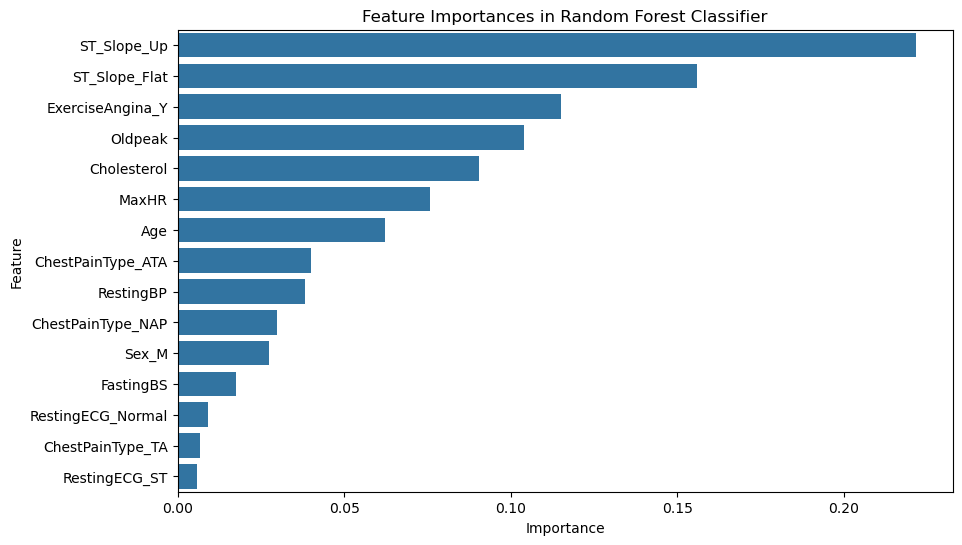

In [ ]:
best_rf = rf_grid_search.best_estimator_

# Evaluating feature importance

# Assuming 'X' is the original DataFrame with feature names
features = X.columns

# Evaluate feature importance
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances in Random Forest Classifier")
plt.show()


## Question 5

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Individual classifier instances (adjust as needed)
logreg_model = LogisticRegression(C=1, max_iter=100, solver='lbfgs')
svm_model = SVC(probability=True)  # Enable probability estimates for soft voting
rf_model = RandomForestClassifier(n_estimators=100)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('svm', svm_model),
    ('rf', rf_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = ensemble_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Ensemble Model Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test on the test set
y_test_pred = ensemble_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Ensemble Model Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Ensemble Model Validation Accuracy: 0.84
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82        66
           1       0.83      0.90      0.86        81

    accuracy                           0.84       147
   macro avg       0.85      0.84      0.84       147
weighted avg       0.85      0.84      0.84       147

Ensemble Model Test Accuracy: 0.89
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
print(f"Testing Accuracy: {log_test_accuracy:.2f}")
print(f"SVM Model Accuracy: {test_accuracy_svm:.2f}")
print(f"Random forest Accuracy: {test_accuracy_rf:.2f}")
print(f"Ensemble Model Test Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.88
SVM Model Accuracy: 0.84
Random forest Accuracy: 0.86
Ensemble Model Test Accuracy: 0.89


## Conclusion

The ensemble model outperforms individual classifiers, demonstrating the power of combining different models to enhance predictive accuracy.

Both the SVM and Random Forest models have slightly lower accuracies, suggesting that further hyperparameter tuning could give better results